In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

### 01_정규분포의 확률밀도함수

In [4]:
# stats에서 확률밀도함수(probability denstiy function)인 pdf 함수를 제공하고 있다.
# 평균값4, 분산1, 확률변수는 2 ~ 6까지 살펴본다.
print(stats.norm.pdf(loc=4, scale=1, x=2))
print(stats.norm.pdf(loc=4, scale=1, x=3))
print(stats.norm.pdf(loc=4, scale=1, x=4))
print(stats.norm.pdf(loc=4, scale=1, x=5))
print(stats.norm.pdf(loc=4, scale=1, x=6))

0.05399096651318806
0.24197072451914337
0.3989422804014327
0.24197072451914337
0.05399096651318806


In [6]:
# pdf 함수의 x 에 다수의 확률변수를 넣어주면 각각의 확률 밀도를 구해 반환해준다.
# 확률 변수
# 0 ~ 8 사이에서 0.1씩 증가
x = np.arange(0, 8, 0.1)
# 각 확률 변수값에 대한 확률 밀도를 가져온다.
# 평균4, 분산1을 준다.
density = stats.norm.pdf(loc=4, scale=1, x=x)
# 데이테 프레임으로 정리한다.
density_df = pd.DataFrame({
    'x' : x,
    'density' : density
})
density_df

,x,density
0,0.0,0.000134
1,0.1,0.000199
2,0.2,0.000292
3,0.3,0.000425
4,0.4,0.000612
...,...,...
75,7.5,0.000873
76,7.6,0.000612
77,7.7,0.000425
78,7.8,0.000292


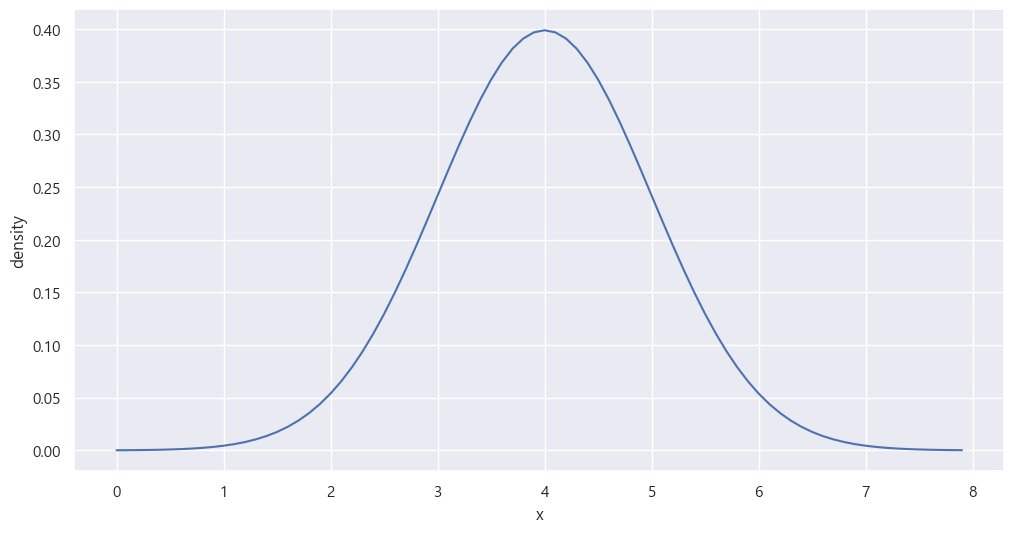

In [9]:
# 선 그래프를 그린다.
# 이 그래프의 형태를 가우스 곡석이라고 부르며 종 모양 곡선이라고 부르기도 한다.
sns.lineplot(data=density_df, x='x', y='density')
plt.show()

In [11]:
# 평균이 달라졌을 때의 그래프
# 평균을 바꿨을 때
density_11 = stats.norm.pdf(loc=1, scale=1, x=x)
density_21 = stats.norm.pdf(loc=2, scale=1, x=x)
density_31 = stats.norm.pdf(loc=3, scale=1, x=x)
density_41 = stats.norm.pdf(loc=4, scale=1, x=x)
# 데이터 프레임
density_df_2 = pd.DataFrame({
    'x' : x,
    '평균1' : density_11,
    '평균2' : density_21,
    '평균3' : density_31,
    '평균4' : density_41,
})

density_df_2.plot(x='x

SyntaxError: unterminated string literal (detected at line 16) (2148853728.py, line 16)

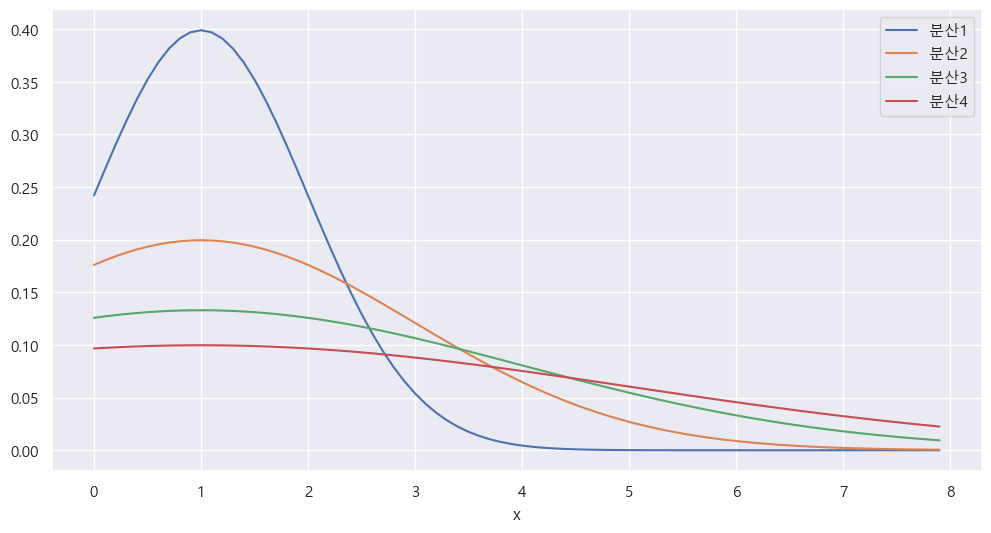

In [13]:
# 분산이 달라졌을 때의 그래프
# 분산을 바꿨을 때
density_11 = stats.norm.pdf(loc=1, scale=1, x=x)
density_12 = stats.norm.pdf(loc=1, scale=2, x=x)
density_13 = stats.norm.pdf(loc=1, scale=3, x=x)
density_14 = stats.norm.pdf(loc=1, scale=4, x=x)
# 데이터 프레임
density_df_3 = pd.DataFrame({
    'x' : x,
    '분산1' : density_11,
    '분산2' : density_12,
    '분산3' : density_13,
    '분산4' : density_14,
})

density_df_3.plot(x='x')
plt.show()

### 02_오차 누적 시뮬레이션

In [16]:
# 올바른 값을 4라고 가정한다.
# 4라는 수치에 작은 오차를 무작위로 1만개 더한다.
# 오차는 -0.01과 0.01이 0.5 확률로 선택된다고 한다.
# -0.01이 더 많이 더해지면 4보다 작아지고
# 0.01이 더 많이 더해지면 4보다 커지게된다.

# 더하거나 빼지는 횟수
n_noise = 10000

# 중심위치
location = 4

# 더하거나 뺄 수
noise = np.array([-0.01, 0.01])

In [18]:
np.random.seed(5)
# 0.01이나 -0.01을 10000번 랜덤하게 추출하여 총합을 구하고
# 그 값을 원래의 값에 더해주어 오차를 발생시킨다.
location + np.sum(np.random.choice(noise, size=n_noise))

3.52

In [20]:
# 위의 실행을 만번 수행한다.
n_trial = 50000

# 오차의 누적을 담을 변수
observation_result = np.zeros(n_trial)

np.random.seed(1)

# 수행 횟수 만큼 반복한다.
for i in range(n_trial) :
    observation_result[i] = location + np.sum(np.random.choice(noise, size=n_noise))

In [21]:
# 전체의 평균을 구한다.
x_bar = np.mean(observation_result)
# 전체의 분산을 구한다.
u2 = np.var(observation_result, ddof=0)
print(f'평균 : {x_bar}')
print(f'분산 : {u2}')

평균 : 3.9975019999999994
분산 : 1.0033284079959999


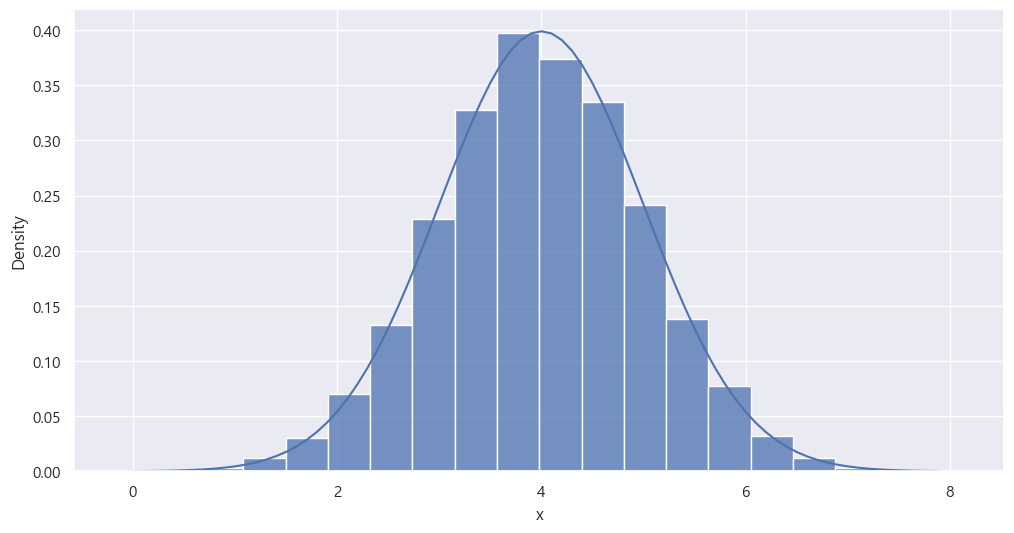

In [22]:
# 위의 결과의 확률밀도함수값을 히스토그램으로 그린다.
sns.histplot(data=observation_result, bins=20, stat='density')
# 평균4, 분산1의 정규분포의 확률 밀도 함수를 그린다.
sns.lineplot(data=density_df, x='x', y='density')

plt.show()